Circuit diagram:
(0, 0): ───H───────@───H───X───────────@───X───H───────────@───H───X───────────@───X───H───────M('result')───
                   │                   │                   │                   │               │
(0, 1): ───H───X───@───X───H───X───────@───X───H───X───────@───X───H───X───────@───X───H───────M─────────────
                   │                   │                   │                   │               │
(0, 2): ───H───H───X───H───H───X───H───X───H───X───H───H───X───H───H───X───H───X───H───X───H───M─────────────
Measurement results for target |101>:
State |000>: 8 times (0.80%) 
State |001>: 2 times (0.20%) 
State |010>: 13 times (1.30%) 
State |011>: 4 times (0.40%) 
State |100>: 7 times (0.70%) 
State |101>: 950 times (95.00%) <-- Target
State |110>: 5 times (0.50%) 
State |111>: 11 times (1.10%) 

Success rate: 95.00% (optimal ~94% after 2 iterations)


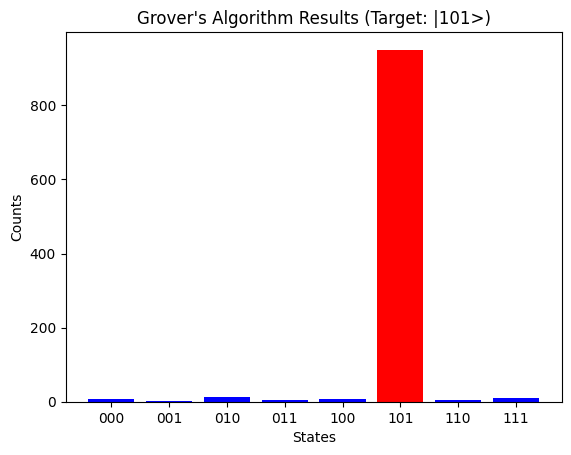

In [ ]:
!pip install cirq
import cirq
import numpy as np
import matplotlib.pyplot as plt
def grover_3_qubit(target_binary):
    qubits = [cirq.GridQubit(0, i) for i in range(3)]
    circuit = cirq.Circuit()
    circuit.append(cirq.H.on_each(*qubits))
    N = 2 ** 3
    iterations = int(np.floor(np.pi/4 * np.sqrt(N)))
    for iteration in range(iterations):
        apply_oracle(circuit, qubits, target_binary)
        apply_diffusion(circuit, qubits)
    circuit.append(cirq.measure(*qubits, key='result'))
    return circuit, qubits
def apply_oracle(circuit, qubits, target_binary):
    for i, bit in enumerate(target_binary):
        if bit == '0':
            circuit.append(cirq.X(qubits[i]))
    circuit.append(cirq.H(qubits[-1]))
    circuit.append(cirq.CCX(qubits[0], qubits[1], qubits[2]))
    circuit.append(cirq.H(qubits[-1]))
    for i, bit in enumerate(target_binary):
        if bit == '0':
            circuit.append(cirq.X(qubits[i]))
def apply_diffusion(circuit, qubits):
    circuit.append(cirq.H.on_each(*qubits))
    circuit.append(cirq.X.on_each(*qubits))
    circuit.append(cirq.H(qubits[-1]))
    circuit.append(cirq.CCX(qubits[0], qubits[1], qubits[2]))
    circuit.append(cirq.H(qubits[-1]))
    circuit.append(cirq.X.on_each(*qubits))
    circuit.append(cirq.H.on_each(*qubits))
def analyze_results(counts, target):
    total = sum(counts.values())
    success = counts.get(int(target, 2), 0)
    success_rate = success / total * 100
    print(f"Measurement results for target |{target}>:")
    for state in range(8):
        bitstr = format(state, '03b')
        count = counts.get(state, 0)
        pct = count / total * 100
        marker = "<-- Target" if bitstr == target else ""
        print(f"State |{bitstr}>: {count} times ({pct:.2f}%) {marker}")
    print(f"\nSuccess rate: {success_rate:.2f}% (optimal ~94% after 2 iterations)")
    states = [format(i, '03b') for i in range(8)]
    values = [counts.get(i, 0) for i in range(8)]
    colors = ['red' if s == target else 'blue' for s in states]
    plt.bar(states, values, color=colors)
    plt.title(f"Grover's Algorithm Results (Target: |{target}>)")
    plt.xlabel("States")
    plt.ylabel("Counts")
    plt.show()
if __name__ == "__main__":
    target = "101"
    circuit, qubits = grover_3_qubit(target)
    print("Circuit diagram:")
    print(circuit)
    simulator = cirq.Simulator()
    result = simulator.run(circuit, repetitions=1000)
    counts = result.histogram(key='result')
    analyze_results(counts, target)

Circuit diagram:
(0, 0): ───H───────@───H───X───────────@───X───H───────────@───H───X───────────@───X───H───────M('result')───
                   │                   │                   │                   │               │
(0, 1): ───H───────@───H───X───────────@───X───H───────────@───H───X───────────@───X───H───────M─────────────
                   │                   │                   │                   │               │
(0, 2): ───H───H───X───H───H───X───H───X───H───X───H───H───X───H───H───X───H───X───H───X───H───M─────────────
Measurement results for target |111>:
State |000>: 9 times (0.90%) 
State |001>: 12 times (1.20%) 
State |010>: 12 times (1.20%) 
State |011>: 10 times (1.00%) 
State |100>: 9 times (0.90%) 
State |101>: 10 times (1.00%) 
State |110>: 13 times (1.30%) 
State |111>: 925 times (92.50%) <-- Target

Success rate: 92.50% (optimal ~94% after 2 iterations)


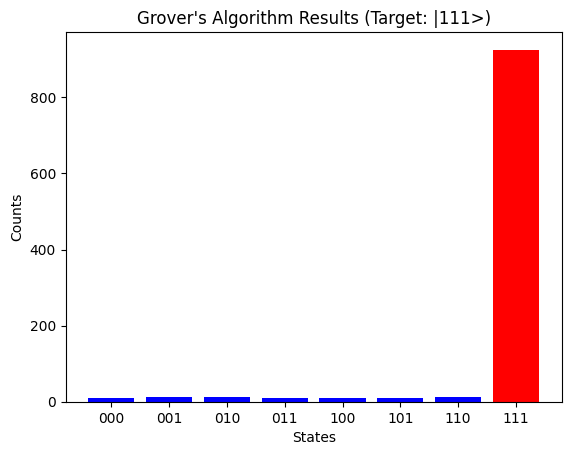

In [ ]:

import cirq
import numpy as np
import matplotlib.pyplot as plt
def grover_3_qubit(target_binary):
    qubits = [cirq.GridQubit(0, i) for i in range(3)]
    circuit = cirq.Circuit()
    circuit.append(cirq.H.on_each(*qubits))
    N = 2 ** 3
    iterations = int(np.floor(np.pi/4 * np.sqrt(N)))
    for iteration in range(iterations):
        apply_oracle(circuit, qubits, target_binary)
        apply_diffusion(circuit, qubits)
    circuit.append(cirq.measure(*qubits, key='result'))
    return circuit, qubits
def apply_oracle(circuit, qubits, target_binary):
    for i, bit in enumerate(target_binary):
        if bit == '0':
            circuit.append(cirq.X(qubits[i]))
    circuit.append(cirq.H(qubits[-1]))
    circuit.append(cirq.CCX(qubits[0], qubits[1], qubits[2]))
    circuit.append(cirq.H(qubits[-1]))
    for i, bit in enumerate(target_binary):
        if bit == '0':
            circuit.append(cirq.X(qubits[i]))
def apply_diffusion(circuit, qubits):
    circuit.append(cirq.H.on_each(*qubits))
    circuit.append(cirq.X.on_each(*qubits))
    circuit.append(cirq.H(qubits[-1]))
    circuit.append(cirq.CCX(qubits[0], qubits[1], qubits[2]))
    circuit.append(cirq.H(qubits[-1]))
    circuit.append(cirq.X.on_each(*qubits))
    circuit.append(cirq.H.on_each(*qubits))
def analyze_results(counts, target):
    total = sum(counts.values())
    success = counts.get(int(target, 2), 0)
    success_rate = success / total * 100
    print(f"Measurement results for target |{target}>:")
    for state in range(8):
        bitstr = format(state, '03b')
        count = counts.get(state, 0)
        pct = count / total * 100
        marker = "<-- Target" if bitstr == target else ""
        print(f"State |{bitstr}>: {count} times ({pct:.2f}%) {marker}")
    print(f"\nSuccess rate: {success_rate:.2f}% (optimal ~94% after 2 iterations)")
    states = [format(i, '03b') for i in range(8)]
    values = [counts.get(i, 0) for i in range(8)]
    colors = ['red' if s == target else 'blue' for s in states]
    plt.bar(states, values, color=colors)
    plt.title(f"Grover's Algorithm Results (Target: |{target}>)")
    plt.xlabel("States")
    plt.ylabel("Counts")
    plt.show()
target = "111"
circuit, qubits = grover_3_qubit(target)
print("Circuit diagram:")
print(circuit)
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=1000)
counts = result.histogram(key='result')
analyze_results(counts, target)